In [1]:
# Install required library

!pip install sentence_transformers -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.9 MB/s eta 0:00:00:00:0100:01


In [2]:
import re
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt


2025-05-21 13:06:56.433706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747832816.626578      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747832816.682416      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import numpy as np
import json
null = None

In [4]:
# Job description for matching  
job_description = """Looking for candidate with 3+ years of experience.  
Must have strong skills in Python (Scikit-learn, TensorFlow, PyTorch), SQL (Spark/Hadoop/ETL), and cloud platforms (AWS/GCP/Azure).  
Experience in NLP, LLMs, GenAI, statistical analysis, and data visualization (Tableau/Power BI) is preferred.  
Remote or based in Mumbai, Bangalore, or Pune."""  

In [5]:
resumes = [{"Name": 'Steve SunA', 'Email': 'stevesun1245@gmail.com', 'Skills': ['Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Deep Learning', 'SQL', 'AI', 'Data Visualization', 'Statistical Analysis', 'Big Data', 'Critical Thinking', 'Storytelling'], 'Education': {'University': ['EDUCATION\nSkyline University'], 'Degree': ['Master of Science in Data Science'], 'GPA': ['3.81 GPA'], 'Start Date': ['August 2018'], 'End Date': ['May 2020']}, 'Experience': {'work': ['DataNova Insights\nData Scientist March 2021 – Present\n• Developed and deployed machine learning models to optimize customer retention, increasing\nengagement by 15%.\n• Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business\ninsights.\n• Built scalable ETL pipelines to process large datasets using Python and SQL.\n• Collaborated with cross-functional teams to improve decision-making through predictive analytics.\nNeural Sphere Labs\nData Scientist June 2019 – December 2023\n• Designed and implemented deep learning models for image classification, improving accuracy by\n20%.\n• Automated data preprocessing and feature engineering workflows using Python and Pandas.\n• Created interactive dashboards in Power BI to visualize key performance indicators (KPIs).\n• Partnered with engineers to deploy ML models into production, ensuring seamless integration.']}}
    
    ,
{
  "Contact Information": {
    "Name": "Steve Sun",
    "Email": "stevesun1245@gmail.com",
    "Phone Number": "(123)456789",
    "Website/Portfolio/LinkedIn": "linkedin.com/in/stevesun",
    "Github Profile": null
  },
  "Education": [
    {
      "Institution Name": "Skyline University",
      "Degree": "Master of Science in Data Science",
      "Graduation Date": "May 2020",
      "GPA": "3.81"
    }
  ],
  "Experience": [
    {
      "Job Title": "Data Scientist",
      "Company Name": "DataNova Insights",
      "Location": "Hyderabad",
      "Dates of Employment": "March 2021 - Present",
      "Description": "Developed and deployed machine learning models to optimize customer retention, increasing engagement by 15%. Conducted exploratory data analysis (EDA) and statistical testing to derive actionable business insights. Built scalable ETL pipelines to process large datasets using Python and SQL. Collaborated with cross-functional teams to improve decision-making through predictive analytics."
    },
    {
      "Job Title": "Data Scientist",
      "Company Name": "Neural Sphere Labs",
      "Location": null,
      "Dates of Employment": "June 2019 - December 2023",
      "Description": "Designed and implemented deep learning models for image classification, improving accuracy by 20%. Automated data preprocessing and feature engineering workflows using Python and Pandas. Created interactive dashboards in Power BI to visualize key performance indicators (KPIs). Partnered with engineers to deploy ML models into production, ensuring seamless integration."
    }
  ],
  "Skills": [
    "Python",
    "SQL",
    "Machine Learning",
    "AI",
    "Data Visualization",
    "Statistical Analysis",
    "Big Data",
    "Cloud Technologies",
    "Problem-Solving",
    "Critical Thinking",
    "Communication",
    "Storytelling"
  ]
},
  {'Contact Information': {'Name': 'pdf1',
   'Email': None,
   'Phone Number': None,
   'Website/Portfolio/LinkedIn': None,
   'Github Profile': None},
  'Education': [{'Institution Name': 'Binghamton University, State University of New York',
    'Degree': 'Masters of Science : Industrial and Systems Engineering',
    'Graduation Date': 'Aug 2016',
    'GPA': '3.51/4.00'},
   {'Institution Name': 'Osmania University',
    'Degree': 'Bachelors of Engineering : Mechanical Engineering',
    'Graduation Date': 'May 2014',
    'GPA': '3.33/4.00'}],
  'Experience': [{'Job Title': 'Data Analyst',
    'Company Name': 'Company Name',
    'Location': 'State',
    'Dates of Employment': '07/2016 to Current',
    'Description': 'Data Analyst'},
   {'Job Title': 'Student Manager',
    'Company Name': 'Company Name',
    'Location': 'State',
    'Dates of Employment': '09/2015 to 05/2016',
    'Description': 'Undertook a leadership and advisory role in training newcomers to hone their culinary and behavioral skills.'},
   {'Job Title': 'Intern',
    'Company Name': 'Company Name',
    'Location': None,
    'Dates of Employment': '06/2013 to 07/2013',
    'Description': 'Identified the areas in the assembly line of a light commercial vehicle where more operations could be housed. Developed a detailed model of improved layout to accommodate more operations using AutoCAD to improve the space utilization by 300%.'},
   {'Job Title': 'Consultant',
    'Company Name': None,
    'Location': None,
    'Dates of Employment': None,
    'Description': "Consultant for a self-storage company to classify the customers as 'worthy' and 'not worthy' based on their activity on the company website using the Random Forest algorithm."}],
  'Skills': ['Apache',
   'AutoCAD',
   'charts',
   'Credit',
   'clients',
   'Data Analysis',
   'Data Visualization',
   'Databases',
   'Dec',
   'decision-making',
   'layout',
   'leadership',
   'MATLAB',
   'Microsoft Access',
   'MS Excel',
   'Minitab',
   'MySQL',
   'Optimization',
   'Oracle Database',
   'Python',
   'SAS',
   'Simulation',
   'Six Sigma',
   'SPSS',
   'SQL',
   'Statistical Analysis',
   'Tableau',
   'Visio',
   'website',
   'R',
   'Base SAS',
   'Numpy',
   'Pandas',
   'Matplotlib',
   'Scikit-learn',
   'SPSS',
   'Minitab',
   'MATLAB',
   'Apache Spark',
   'SQL',
   'MS Excel',
   'MS Visio',
   'Tableau',
   'MySQL',
   'Oracle Database',
   'Microsoft Access']}
    ,
    
    {'contactInformation': {'name': 'Sagun Pandeypdf2',
   'email': None,
   'phoneNumber': None,
   'website': 'www.sagunpandey.com',
   'linkedin': 'www.linkedin.com/in/sagunpandey',
   'github': 'www.github.com/sagunpandey'},
  'education': [{'institutionName': 'Lamar University',
    'degree': 'Master of Science : Computer Science',
    'graduationDate': '2017'},
   {'institutionName': 'Tribhuvan University',
    'degree': 'Bachelor of Engineering : Electronics and Communication Engineering',
    'graduationDate': '2013'}],
  'experience': [{'jobTitle': 'Information Technology Intern (Test Automation Engineer)',
    'companyName': 'Company Name',
    'location': 'City, State',
    'datesOfEmployment': '05/2017 to 08/2017',
    'description': "Created nicely baked ‘Test Automation Framework' to provide an execution environment for the automation test scripts."},
   {'jobTitle': 'Java Full Stack Developer',
    'companyName': 'Company Name',
    'location': 'City, State',
    'datesOfEmployment': '05/2014 to 06/2016',
    'description': 'Worked on varied aspects of application development including requirement analysis, design, implementation, and testing.'},
   {'jobTitle': 'Java Developer Intern',
    'companyName': 'Company Name',
    'location': 'City, State',
    'datesOfEmployment': '03/2014 to 05/2014',
    'description': 'Core Java programming with Multithreading Exception Handling, File Handling, IO, Generics, and Java Collections.'},
   {'jobTitle': 'Software Developer Intern',
    'companyName': 'Company Name',
    'location': 'City, State',
    'datesOfEmployment': '01/2013 to 10/2013',
    'description': 'Designed and developed applications using Scrum, an iterative and incremental Agile Software Development methodology.'}],
  'skills': ['Java/J2EE',
   'JavaScript',
   'Android',
   'HTML',
   'CSS',
   'SQL',
   'C',
   'C',
   'Spring',
   'Restful-Web Services',
   'Hibernate',
   'AngularJS',
   'ReactJS',
   'jQuery',
   'Bootstrap',
   'Selenium WebDriver',
   'Cucumber',
   'MySQL',
   'PostgreSQL',
   'Oracle',
   'MongoDB',
   'Gradle',
   'Maven',
   'Ant',
   'Agile/Scrum',
   'Waterfall',
   'TDD',
   'Clean Coding',
   'Continuous Delivery',
   'Microservices',
   'Single Page Application',
   'REST',
   'Client/Server',
   'SVN',
   'Git',
   'AWS',
   'Bower',
   'Grunt',
   'Npm',
   'Node',
   'JSON',
   'XML',
   'Jenkins',
   'Eclipse',
   'IntelliJ',
   'Android Studio',
   'Linux',
   'Windows']}
             ,
    {'Contact Information': {'Name': 'pdf3',
   'Email': None,
   'Phone Number': None,
   'Website/Portfolio/LinkedIn': None,
   'Github Profile': None},
  'Education': [{'Institution Name': 'University of Pennsylvania, School of Eng. and Applied Science',
    'Degree': 'Master of Science : Mech. Eng. & Applied Mechanics',
    'Graduation Date': 'Jun'},
   {'Institution Name': 'Harbin Institute of Technology (HIT)',
    'Degree': 'Bachelor of Science : Mechanical Design and Automation',
    'Graduation Date': 'SepAug'}],
  'Experience': [{'Job Title': 'R&D Product Development Engineer',
    'Company Name': 'Company Name',
    'Location': 'City',
    'Dates of Employment': 'June 2016 to Current',
    'Description': 'Design and build a tail-sitter VTOL(vertical take off and landing) UAV(unmanned aerial vehicle) which takes off and lands vertically and travels horizontally. Main duties include but not limit to aerodynamics modeling, UAV control system design, mechanical manufacturing, simulation and tuning/experiments.'},
   {'Job Title': 'Research assistant',
    'Company Name': 'Company Name',
    'Location': 'City',
    'Dates of Employment': 'May 2015 to February 2016',
    'Description': 'Research assistant for Wharton School environment economics projects on Europe Emission Trading System (EU ETC). Main duties include large scale data collecting, cleaning, merging, database construction and data analysis, etc.'},
   {'Job Title': 'Mechanical Technician',
    'Company Name': 'Company Name',
    'Location': 'City',
    'Dates of Employment': 'August 2013 to September 2013',
    'Description': 'Check, report on reducer components, automobile chassis producing, processing and assembly line. Trained in mechanical manufacturing fundamentals in industrial production of automobiles.'}],
  'Skills': ['3D',
   'assembly language',
   'AutoCAD',
   'automobiles',
   'C',
   'C language',
   'CAD',
   'Chinese',
   'Clustering',
   'com',
   'controller',
   'data analysis',
   'Database',
   'database software',
   'designing',
   'economics',
   'Editing',
   'embedded system',
   'English',
   'Experiments',
   'GUI',
   'graphic',
   'Java',
   'Laser',
   'Lathe',
   'Machine Learning',
   'MATLAB',
   'Mechanical',
   'Mechanical Design',
   'Mechanical Engineering',
   'Excel',
   'Windows 7',
   'Word',
   'Mill',
   'Modeling',
   'Networks',
   'Neural',
   'Operating Systems',
   'OS',
   'painting',
   'camera',
   'PLC',
   'predict',
   'producing',
   'Programming',
   'Python',
   'Rendering',
   'Research',
   'Robotics',
   'Simulation',
   'Solidworks',
   'SPSS',
   'SQL',
   'SQL Server',
   'STATA',
   'Statistics',
   'system design',
   'Trading System',
   'vision']},
           
    {'contactInformation': {'name': 'Chu-Hsiang Wupdf4',
   'email': None,
   'phoneNumber': None,
   'website/portfolio/linkedIn': None,
   'githubProfile': None},
  'education': [{'institutionName': 'UT Austin',
    'degree': 'Ph.D',
    'graduationDate': 'May 2018',
    'fieldOfStudy': 'PETROLEUM ENGINEERING Scientific Computation'},
   {'institutionName': 'National Taiwan University',
    'degree': 'M.S',
    'graduationDate': 'Jun. 2010',
    'fieldOfStudy': 'MECHANICAL ENGINEERING'},
   {'institutionName': 'National Tsing Hua University',
    'degree': 'B.S',
    'graduationDate': 'Jun. 2008',
    'fieldOfStudy': 'POWER MECHANICAL ENGINEERING'}],
  'experience': [{'jobTitle': 'ENGINEERING INTERN',
    'companyName': 'Company Name',
    'location': 'State',
    'datesOfEmployment': '08/2016 - 12/2016',
    'description': 'Develop a cavings transport model for optimizing hole-cleaning operations. Developed a solids transport model for predicting cuttings/cavings bed height during a hole-cleaning operation.'},
   {'jobTitle': 'ENGINEERING INTERN',
    'companyName': None,
    'location': 'City, State',
    'datesOfEmployment': '05/2016 - 08/2016',
    'description': 'Optimize diverter pumping schedule for better production performance after well re-stimulation. Built a simulator to model proppant, diverter, and slurry distribution in a plug-and-perf hydraulic fracturing operation.'},
   {'jobTitle': 'PROCESS ENGINEER',
    'companyName': 'Company Name',
    'location': 'City',
    'datesOfEmployment': '04/2012 - 05/2013',
    'description': 'Improve display yield through statistical modeling, process control, and tool modifications. Won Qualstar award in Nov. 2012 by completing two specific yield improvement tasks in merely two months.'}],
  'skills': ['C++',
   'Python',
   'MATLAB',
   'Git',
   'Bash',
   'R',
   'SQL',
   'Machine Learning',
   'Linux',
   'Unix',
   'High performance computing clusters',
   'Scikit-learn',
   'Pandas',
   'Seaborn',
   'matplotlib',
   'TensorFlow',
   'CFD-DEM',
   'OpenFOAM',
   'CFD-ACE+',
   'Fluent',
   'COMSOL',
   'LAMMPS',
   'LIGGGHTS',
   'CMG',
   'FracPro',
   'Saphir',
   'SEM',
   'AFM',
   'Confocal Microscopy',
   'Regression analysis',
   'Statistical process control',
   'Design of experiments']},
    {'contactInformation': {'name': 'Aaditya Vijay Hirurkarpdf5',
   'email': None,
   'phoneNumber': None,
   'websitePortfolioLinkedIn': None,
   'githubProfile': None},
  'education': {'institutionName': 'University of Mumbai',
   'degree': 'Bachelor of Engineering, Information Technology',
   'graduationDate': '2008'},
  'experience': [{'jobTitle': 'Business Analyst Sr. Technical Business Analyst',
    'companyName': 'Company Name',
    'location': None,
    'datesOfEmployment': 'Jul 2011 to Dec 2013',
    'description': 'Requirement Gathering, Requirement Analysis, Release management, Product management, Product implementation role, BRS analysis, Feasibility analysis, Vender management, Client handling, Product Management'},
   {'jobTitle': 'Software Implementation Engineer',
    'companyName': 'Base Information Management Pvt. Ltd.',
    'location': None,
    'datesOfEmployment': 'Dec 2008 to Jul 2011',
    'description': 'To communicate directly with the client and gather details of requirement, Documentation (URS,SRS), Designing screen layouts, Interact with development team, QC team for effective solution'}],
  'skills': ['C',
   'C++',
   'Core Java',
   'Oracle 9i',
   'MS SQL Server-2005',
   'IBM DB2',
   'UML',
   'HTML',
   'XML',
   'Windows 9X/XP/2000/2003 Server',
   'Linux Red hat 5',
   'SUSE 11',
   'Rational Rose',
   'MS Visio',
   'MS Project',
   'Oracle SQL Developer',
   'Crystal Reports',
   'Java Workflow Editor',
   'Eclipse',
   'Jboss',
   'Tomcat5',
   'IBM Websphere App Server 7']} ]
           

In [10]:
# from sentence_transformers import SentenceTransformer, util

def normalize_text(data):
    """Improved text normalization that handles nested structures and prioritizes key fields."""
    if isinstance(data, str):
        return data
    elif isinstance(data, list):
        return " ".join(normalize_text(item) for item in data)
    elif isinstance(data, dict):
        # Prioritize description/role fields
        if "description" in data:
            return normalize_text(data["description"])
        elif "jobTitle" in data or "Job Title" in data:
            return normalize_text(data.get("jobTitle") or data.get("Job Title"))
        else:
            return " ".join(normalize_text(v) for v in data.values())
    else:
        return str(data)

def get_skills(resume):
    """Case-insensitive skill extraction"""
    for key in ["Skills", "skills", "SKILLS"]:
        if key in resume:
            return resume[key]
    return []

def get_experience(resume):
    """Case-insensitive experience extraction"""
    for key in ["Experience", "experience", "EXPERIENCE"]:
        if key in resume:
            return resume[key]
    return {}


def clamp_score(score):
    """Ensure score is between 0 and 1"""
    return max(0.0, min(1.0, float(score)))


def match_resume_to_job(resume_text, job_description, model):
    """
    Compute similarity between resume text and job description using a sentence-transformer model.
    """
    embeddings = model.encode([resume_text, job_description], convert_to_tensor=True)
    similarity = util.cos_sim(embeddings[0], embeddings[1])
    return similarity.item()

def compute_skill_match(skills, job_description):
    """Improved with synonyms, partial matches, and mandatory skills"""
    mandatory_skills = {"python", "sql", "machine learning", "aws", "gcp", "azure"}
    synonyms = {
        "ml": "machine learning", "ai": "artificial intelligence",
        "nlp": "natural language processing", "pytorch": "torch",
        "tensorflow": "tf", "dl": "deep learning", "spark": "apache spark",
    }
    
    job_desc_lower = job_description.lower()
    skill_matches = 0
    
    for skill in skills:
        skill_lower = skill.lower()
        skill_lower = synonyms.get(skill_lower, skill_lower)
        # Check both full and partial matches
        if any(skill_word in job_desc_lower for skill_word in skill_lower.split()):
            skill_matches += 1
    
    # Penalty capped at 50% for missing mandatory skills
    missing_mandatory = max(0, len(mandatory_skills - {s.lower() for s in skills}))
    penalty = min(0.5, 0.1 * missing_mandatory)
    
    return max(0, (skill_matches / max(1, len(mandatory_skills))) - penalty)

def rank_candidates(resumes, job_description, model):
    """Final ranking with all fixes applied"""
    scores = []
    for resume in resumes:
        # Extract data with case-insensitive handling
        skills = get_skills(resume)
        experience = get_experience(resume)
        education = resume.get("Education") or resume.get("education") or {}
        
        # Normalize text
        skills_text = normalize_text(skills)
        experience_text = normalize_text(experience)
        education_text = normalize_text(education)
        
        # Compute scores
        skill_score = clamp_score(match_resume_to_job(skills_text, job_description, model))
        experience_score = clamp_score(match_resume_to_job(experience_text, job_description, model))
        education_score = clamp_score(match_resume_to_job(education_text, job_description, model))
        keyword_score = clamp_score(compute_skill_match(skills, job_description))
        
        # Weighted scoring (adjusted weights)
        total_score = (
            0.4 * skill_score +
            0.4 * experience_score + 
            0.1 * education_score +
            0.1 * keyword_score
        )
        
        # Get candidate name
        name = (
            resume.get("Name") or
            resume.get("contactInformation", {}).get("name") or
            resume.get("Contact Information", {}).get("Name") or
            f"Unknown Candidate {len(scores)+1}"
        )
        
        scores.append({
            "Name": name,
            "Skill Score": skill_score,
            "Experience Score": experience_score,
            "Education Score": education_score,
            "Keyword Match Score": keyword_score,
            "Total Score": clamp_score(total_score)
        })
    
    return sorted(scores, key=lambda x: x["Total Score"], reverse=True)

In [7]:
def plot_scores(ranked_candidates, top_n=10):
    """
    Visualize the scores of candidates using a grouped bar chart with better formatting.
    
    Args:
        ranked_candidates: List of candidate dictionaries with scores
        top_n: Number of top candidates to display (default: 10)
    """
    # Take only top N candidates
    candidates = ranked_candidates[:top_n]
    if not candidates:
        print("No candidates to plot")
        return

    # Prepare data
    names = [candidate['Name'] for candidate in candidates]
    categories = ['Skill', 'Experience', 'Education', 'Keyword Match']
    scores = {
        'Skill': [candidate['Skill Score'] for candidate in candidates],
        'Experience': [candidate['Experience Score'] for candidate in candidates],
        'Education': [candidate['Education Score'] for candidate in candidates],
        'Keyword Match': [candidate['Keyword Match Score'] for candidate in candidates],
        'Total': [candidate['Total Score'] for candidate in candidates]
    }

    # Plot setup
    plt.figure(figsize=(12, 8))
    bar_width = 0.15
    index = np.arange(len(names))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    # Create bars for each category
    for i, (category, color) in enumerate(zip(categories, colors)):
        plt.bar(index + i*bar_width, scores[category], bar_width, 
                label=category, color=color)

    # Add total scores as a line plot
    plt.plot(index + 1.5*bar_width, scores['Total'], 
             color='black', marker='o', linestyle='-', 
             linewidth=2, markersize=8, label='Total Score')

    # Configure plot details
    plt.xticks(index + 1.5*bar_width, names, rotation=45, ha='right')
    plt.xlabel("Candidates", fontsize=12)
    plt.ylabel("Scores", fontsize=12)
    plt.title("Candidate Comparison Scores", fontsize=14, pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add grid and adjust layout
    plt.grid(axis='y', alpha=0.3)
    plt.ylim(0, 1.1)  # Leave room for legend
    plt.tight_layout()
    
    # Show plot
    plt.show()

In [8]:
# Load SentenceTransformer model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Rank candidates
ranked_candidates = rank_candidates(resumes, job_description, model)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Display ranked candidates
for candidate in ranked_candidates:
    print(f"Name: {candidate['Name']}, Total Score: {candidate['Total Score']:.2f}")

Name: pdf1, Total Score: 0.46
Name: Steve SunA, Total Score: 0.45
Name: Steve Sun, Total Score: 0.38
Name: pdf3, Total Score: 0.35
Name: Chu-Hsiang Wupdf4, Total Score: 0.30
Name: Aaditya Vijay Hirurkarpdf5, Total Score: 0.29
Name: Sagun Pandeypdf2, Total Score: 0.21


In [13]:
# Display ranked candidates with detailed scores
for i, candidate in enumerate(ranked_candidates, 1):
    print(f"\nCandidate #{i}: {candidate['Name']}")
    print("-" * 40)
    print(f"Total Score: {candidate['Total Score']:.2f}/1.00")
    print(f"• Skill Score: {candidate['Skill Score']:.2f}")
    print(f"• Experience Score: {candidate['Experience Score']:.2f}")
    print(f"• Education Score: {candidate['Education Score']:.2f}")
    print(f"• Keyword Match: {candidate['Keyword Match Score']:.2f}")


Candidate #1: pdf1
----------------------------------------
Total Score: 0.46/1.00
• Skill Score: 0.37
• Experience Score: 0.44
• Education Score: 0.32
• Keyword Match: 1.00

Candidate #2: Steve SunA
----------------------------------------
Total Score: 0.45/1.00
• Skill Score: 0.36
• Experience Score: 0.48
• Education Score: 0.41
• Keyword Match: 0.70

Candidate #3: Steve Sun
----------------------------------------
Total Score: 0.38/1.00
• Skill Score: 0.36
• Experience Score: 0.31
• Education Score: 0.36
• Keyword Match: 0.70

Candidate #4: pdf3
----------------------------------------
Total Score: 0.35/1.00
• Skill Score: 0.30
• Experience Score: 0.32
• Education Score: 0.29
• Keyword Match: 0.70

Candidate #5: Chu-Hsiang Wupdf4
----------------------------------------
Total Score: 0.30/1.00
• Skill Score: 0.33
• Experience Score: 0.11
• Education Score: 0.24
• Keyword Match: 1.00

Candidate #6: Aaditya Vijay Hirurkarpdf5
----------------------------------------
Total Score: 0.29/

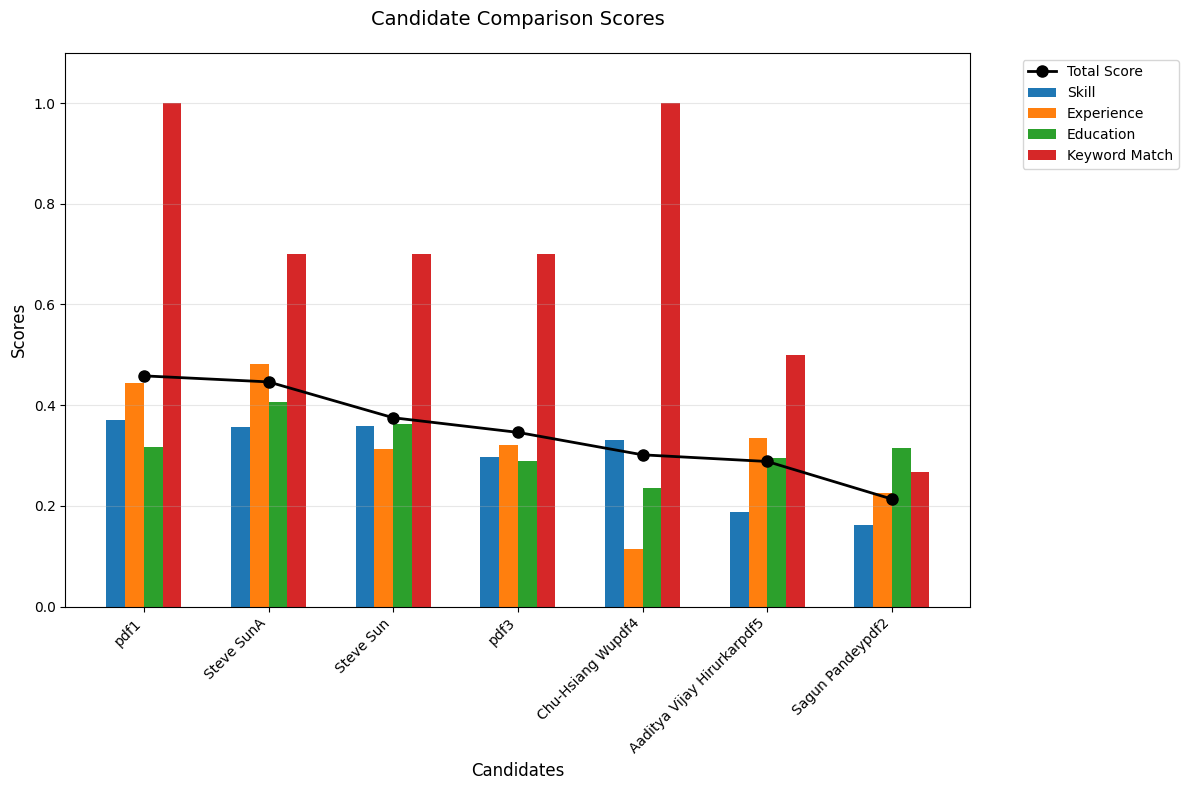

In [14]:
# Plot the scores
plot_scores(ranked_candidates)

In [15]:
!pip install groq
!pip install -qU langchain_community

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.8 MB/s eta 0:00:00


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.9/437.9 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
pandas-gbq 0.28.0 requires google-ap

In [16]:
import os

os.environ["GROQ_API_KEY"] = "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"
from groq import Groq

In [17]:
client = Groq()

In [30]:
def generate_feedback(ranked_candidates, job_description):
    feedback_reports = []
    
    for candidate in ranked_candidates:
        prompt = f"""
        Job Description: {job_description[:500]}... [truncated]
        
        Candidate Score: {candidate['Total Score']:.2f}/1.0
        - Skills Match: {candidate['Skill Score']:.2f}
        - Experience Match: {candidate['Experience Score']:.2f}
        - Education Match: {candidate['Education Score']:.2f}
        
        Generate structured feedback with:
        1. THREE key strengths (bullet points)
        2. THREE main gaps (bullet points)
        3. TWO specific upskilling recommendations (bullet points)
        
        Format exactly like this example:
        [Candidate Name] Analysis:
        ✓ Strengths:
        - Strength 1
        - Strength 2
        - Strength 3
        
        ✗ Missing Qualifications:
        - Gap 1
        - Gap 2
        - Gap 3
        
        ↗ Recommendations:
        - Recommendation 1
        - Recommendation 2
        """
        
        response = client.chat.completions.create(
            model="llama3-70b-8192",
            messages=[
                {"role": "system", "content": "You are a strict career advisor. Use only the template provided."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.5,  # Lower for more structured output
        )
        
        feedback_reports.append({
            "name": candidate["Name"],
            "score": candidate["Total Score"],
            "feedback": response.choices[0].message.content
        })
    
    return feedback_reports

In [32]:
import pprint

In [34]:
feedback = generate_feedback(ranked_candidates, job_description) 

In [35]:
pprint.pp(feedback)

[{'name': 'pdf1',
  'score': 0.4582245379686356,
  'feedback': '[Candidate Name] Analysis:\n'
              '\n'
              '✓ Strengths:\n'
              '- You have some experience with Python, which is a crucial '
              'skill for this role.\n'
              '- You have a basic understanding of SQL, which is essential for '
              'data management.\n'
              '- You have a decent educational background, which is a good '
              'starting point.\n'
              '\n'
              '✗ Missing Qualifications:\n'
              '- You lack experience with cloud platforms like AWS, GCP, and '
              'Azure, which is a critical requirement.\n'
              "- You don't have sufficient experience with NLP, LLMs, GenAI, "
              'and statistical analysis, which are preferred skills.\n'
              "- You don't have hands-on experience with data visualization "
              'tools like Tableau and Power BI, which is a necessary skill for '
    